##### About the dataset

Customer satisfaction is one of the key factor in the success of E-commerce platform, analysing various factors which plays a crucial role in customer satisfaction

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

#### Loading dataset

In [2]:
df = pd.read_excel("cust_retension.xlsx")
df.head(3)

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   
2                      1                    2   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   
2                                           4   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       
2                                                  5                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          
2                                                  3          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          
2                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      
2                                                  4                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        
2                                                  2                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in        
1  ...                            Amazon.in, Flipkart.com        
2  ...                                         Myntra.com        

   Longer time in displaying graphics and photos (promotion, sales period)  \
0                                          Amazon.in                         
1                                         Myntra.com                         
2                                         Myntra.com                         

   Late declaration of price (promotion, sales period)  \
0                                       Flipkart.com     
1                                       snapdeal.com     
2                                         Myntra.com     

   Longer page loading time (promotion, sales period)  \
0                                       Flipkart.com    
1                                       Snapdeal.com    
2                                         Myntra.com    

   Limited mode of payment on most products (promotion, sales period)  \
0                                          Amazon.in                    
1                                       Snapdeal.com                    
2                                          Amazon.in                    

   Longer delivery period  Change in website/Application design  \
0               Paytm.com                          Flipkart.com   
1            Snapdeal.com                          

In [3]:
df.shape

(269, 71)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    int64 
 1   2 How old are you?                                                                                                                                                                    

#### Checking for null values

In [5]:
pd.set_option('display.max_rows',None)
df.isnull().sum()

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          

#### The dataset doen't have any null values

#### I am considering '6 How many times you have made an online purchase in the past 1 year?' as the target variable because if the customer is satisfied then definetly they will do more shopping

#### To make the data analysis hussle free lets split the dataset into x and y

In [6]:
x = df.drop('6 How many times you have made an online purchase in the past 1 year?',axis=1)

In [7]:
y = df['6 How many times you have made an online purchase in the past 1 year?']

In [26]:
y.value_counts()

0    114
3     63
4     53
1     29
2     10
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64

<AxesSubplot:xlabel='1Gender of respondent', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

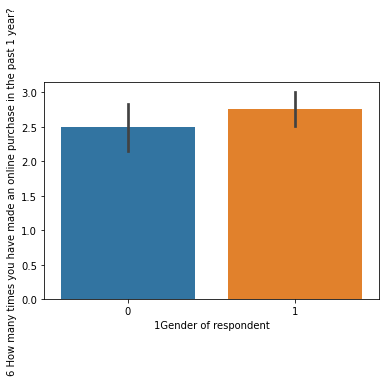

In [8]:
sns.barplot(x = x['1Gender of respondent'],y=y,data=df)

<AxesSubplot:xlabel='2 How old are you? ', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

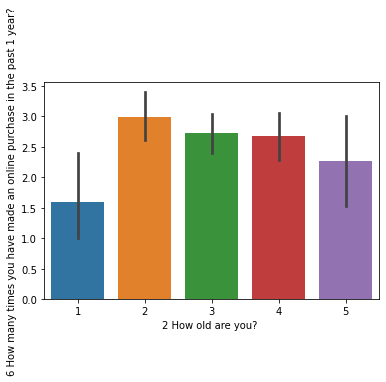

In [9]:
sns.barplot(x = x['2 How old are you? '],y=y,data=df)

#### 0 - Age less than 20
#### 1 - Age in the range of 21-30
#### 2 - Age in the range of 31-40
#### 3 - Age in the range of 41-50
#### 4 - Age above 51 years
##### From the graph it is evident that people in the age group of 21-30 does more online shopping

#### Females tend to do more online shopping than men

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

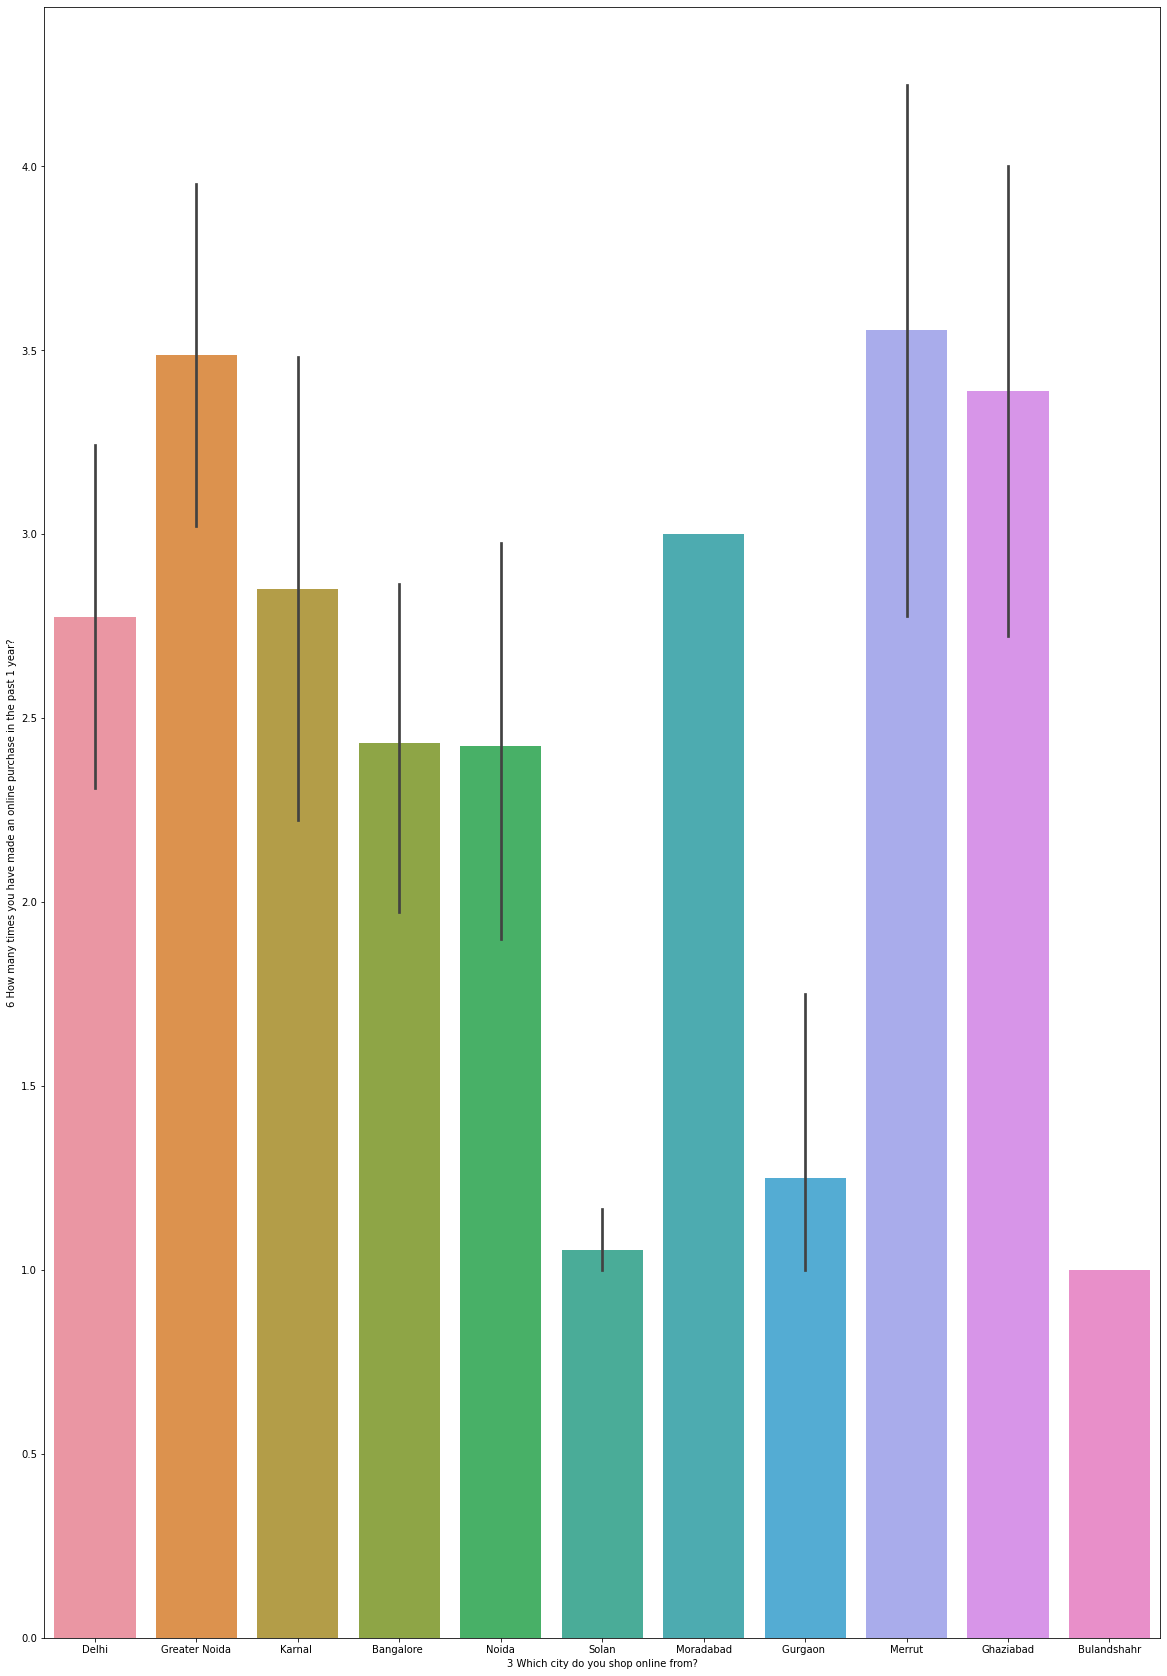

In [10]:
plt.figure(figsize=(20,30))
sns.barplot(x = x['3 Which city do you shop online from?'],y=y,data=df)

#### More online shopping is done from 'Merrut' followed by 'Greater Noida' and 'Ghaziabad'

<AxesSubplot:xlabel='4 What is the Pin Code of where you shop online from?', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

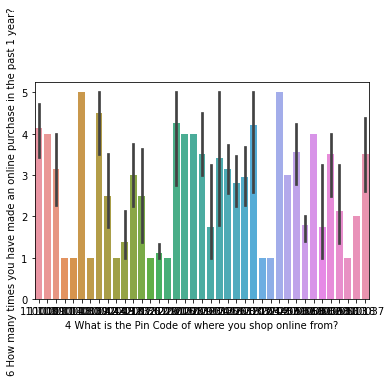

In [10]:
sns.barplot(x = x['4 What is the Pin Code of where you shop online from?'],y=y,data=df)

<AxesSubplot:xlabel='5 Since How Long You are Shopping Online ?', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

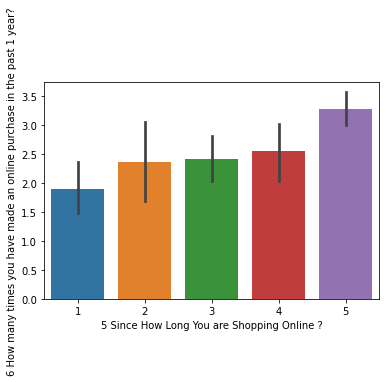

In [11]:
sns.barplot(x = x['5 Since How Long You are Shopping Online ?'],y=y,data=df)

##### Applying Label Encoding techniques

In [9]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for column in df:
    df[column] = label_enc.fit_transform(df[column])
df.head(5)

1Gender of respondent  2 How old are you?   \
0                      0                    2   
1                      1                    1   
2                      1                    1   
3                      0                    1   
4                      1                    1   

   3 Which city do you shop online from?  \
0                                      2   
1                                      2   
2                                      4   
3                                      6   
4                                      0   

   4 What is the Pin Code of where you shop online from?  \
0                                                  1       
1                                                  5       
2                                                 23       
3                                                 11       
4                                                 31       

   5 Since How Long You are Shopping Online ?  \
0                                           4   
1                                           4   
2                                           3   
3                                           3   
4                                           2   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  3                       
1                                                  4                       
2                                                  4                       
3                                                  0                       
4                                                  1                       

   7 How do you access the internet while shopping on-line?  \
0                                                  2          
1                                                  0          
2                                                  1          
3                                                  1          
4                                                  0          

   8 Which device do you use to access the online shopping?  \
0                                                  2          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  2                                                      
1                                                  0                                                      
2                                                  1                                                      
3                                                  1                                                      
4                                                  0                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  0                                                        
1                                                  2                                                        
2                                                  1                                                        
3                                                  2                                                        
4                                                  2                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                                  0        
1  ...                                                  1        
2  ...                                                  7        
3  ...    

#### Customers who started online shopping above 4years tend to shop more

In [13]:
df.skew()

1Gender of respondent                                                                                                                                                                                                 -0.723007
2 How old are you?                                                                                                                                                                                                     0.063243
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  1.748322
5 Since How Long You are Shopping Online ?                                                                                                                                                                            -0.554705
6 How many times you have made an online purchase in the past 1 year?                                   

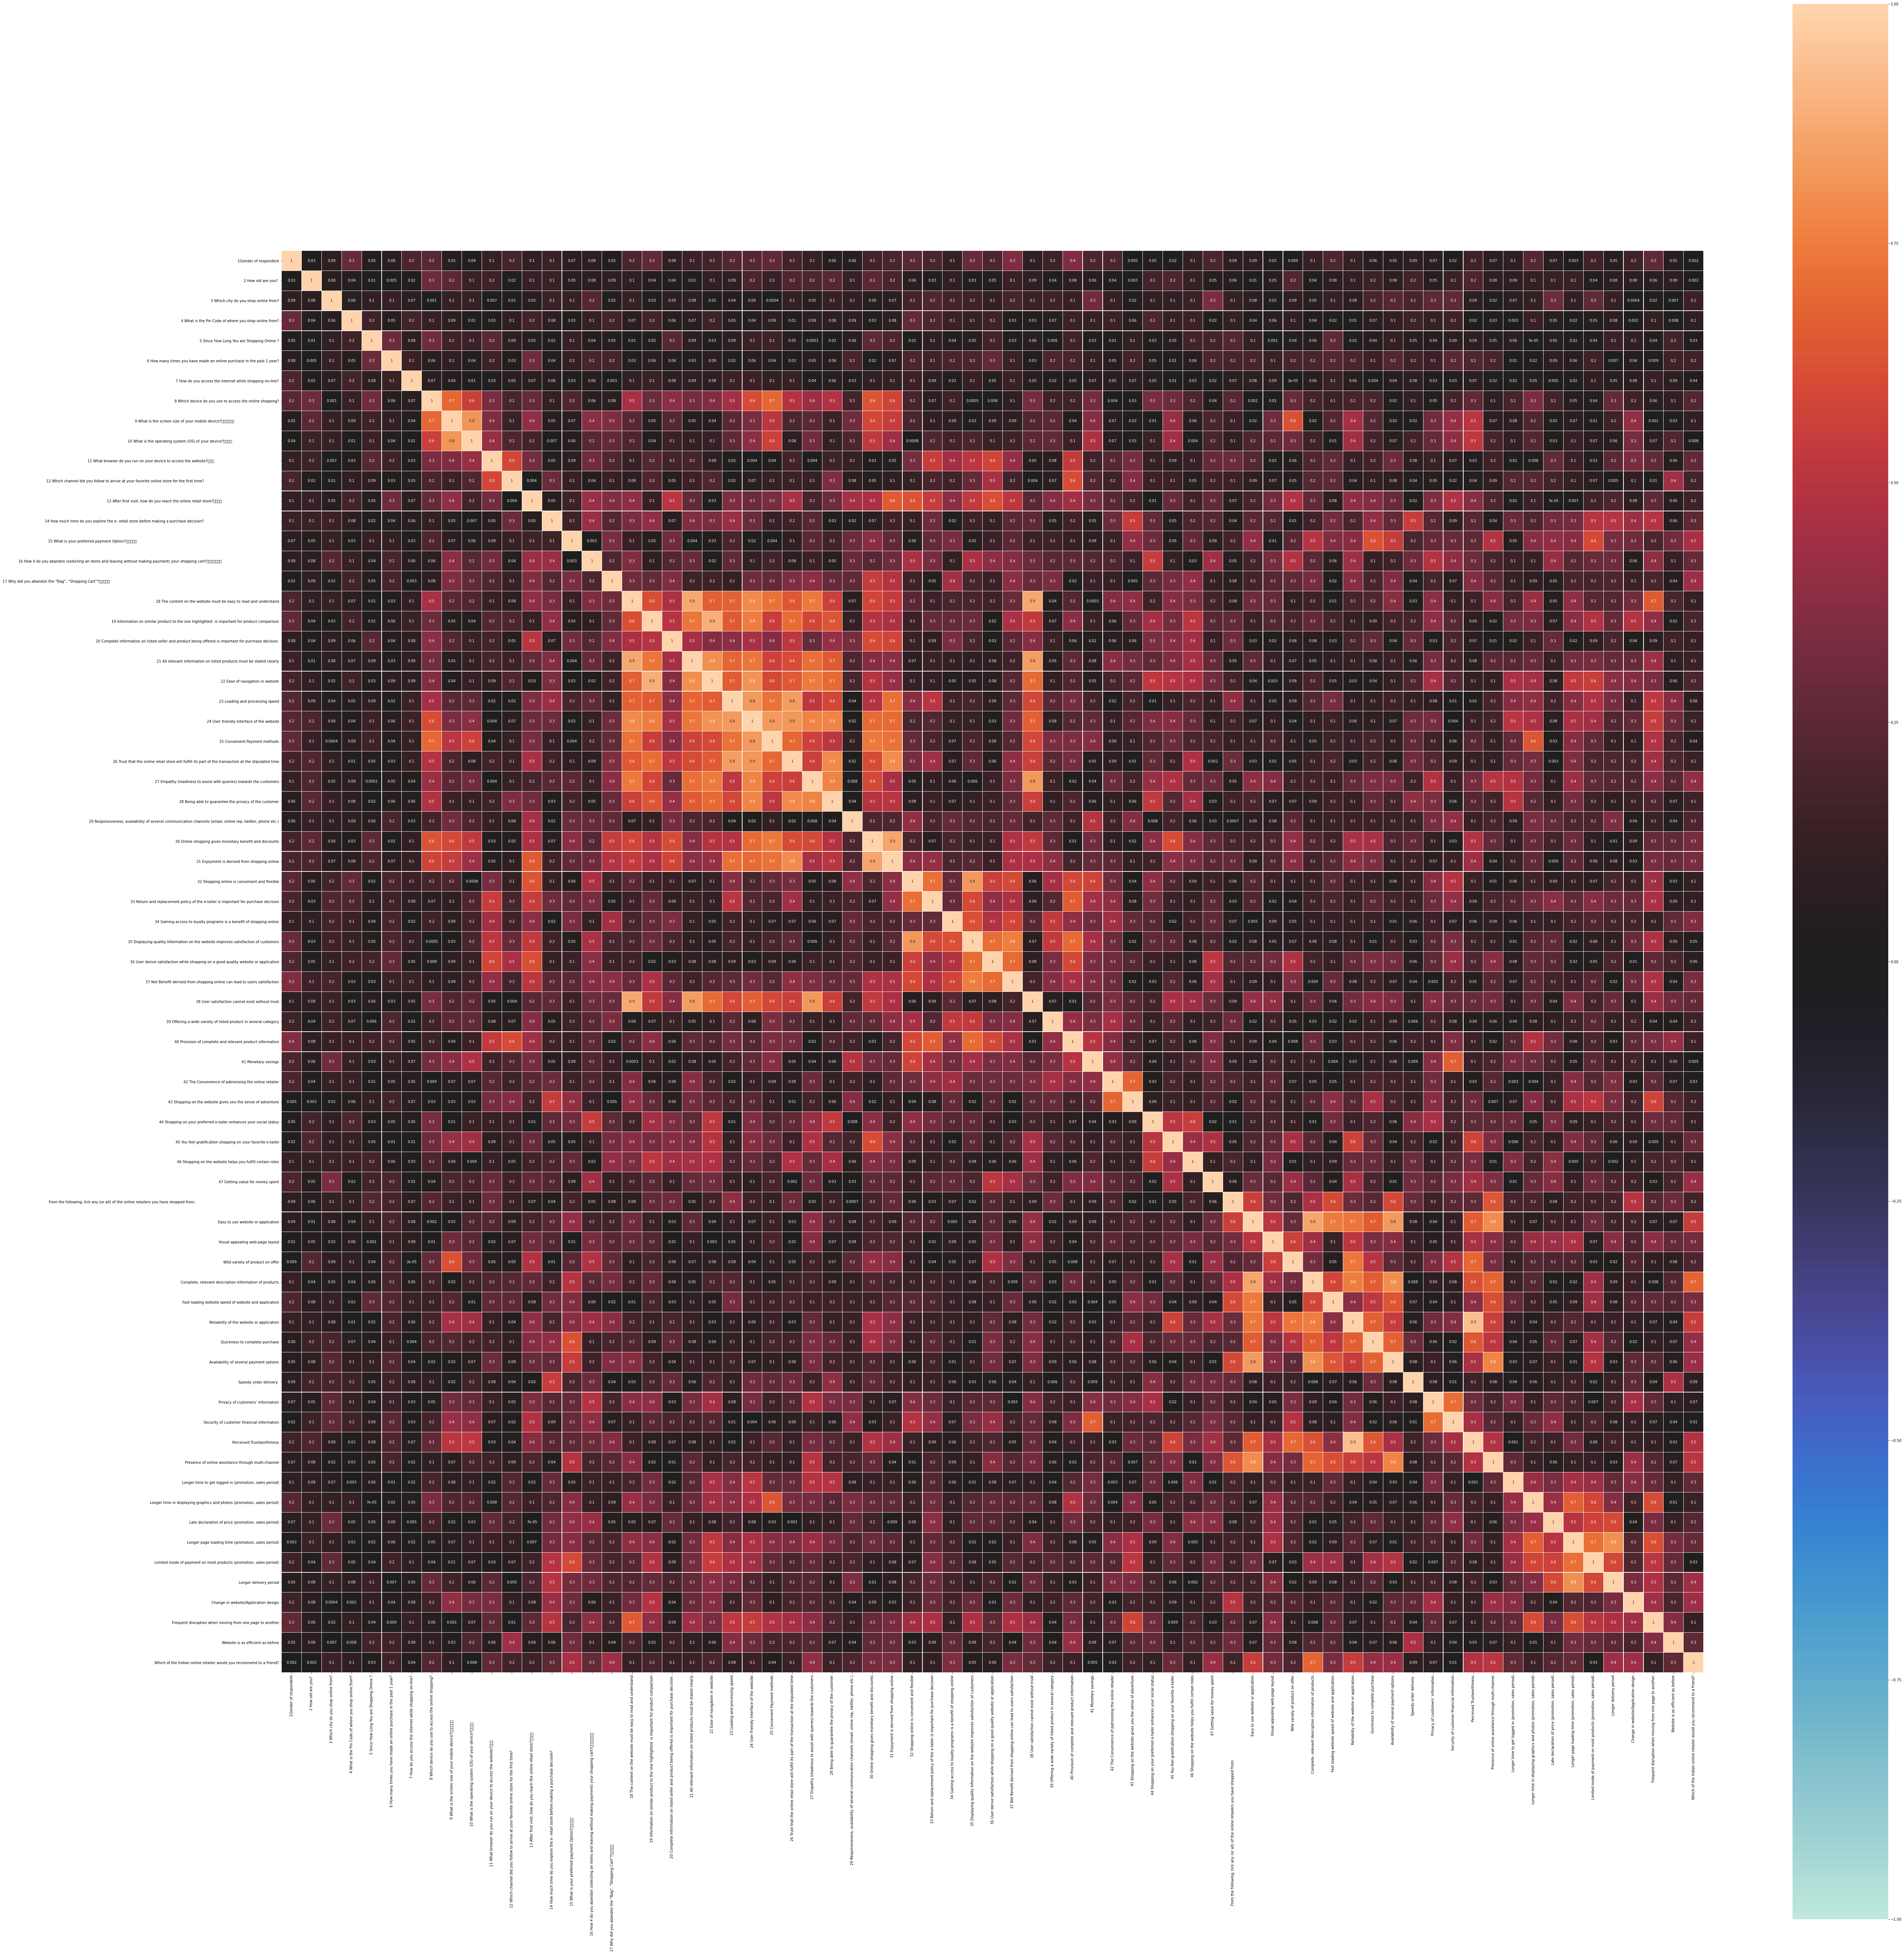

In [10]:
df_corr = df.corr().abs()
plt.figure(figsize=(80,80))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square = True,center=0,fmt='.1g',linewidth=.2)
plt.tight_layout()

#### Finding the correlation of feture variables with target

In [13]:
df[df.columns[1:]].corr()['6 How many times you have made an online purchase in the past 1 year?'][:]

2 How old are you?                                                                                                                                                                                                     0.005089
3 Which city do you shop online from?                                                                                                                                                                                 -0.127906
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0.045947
5 Since How Long You are Shopping Online ?                                                                                                                                                                             0.291104
6 How many times you have made an online purchase in the past 1 year?                                   

#### Exploring the relationship of variuos factors with target variable

<AxesSubplot:xlabel='Perceived Trustworthiness', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

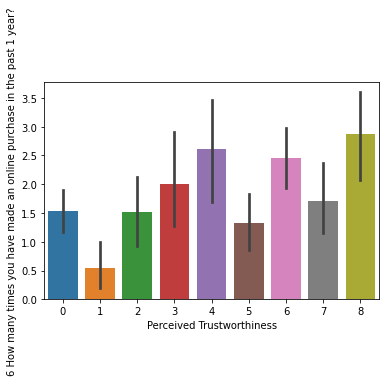

In [25]:
sns.barplot(x = df['Perceived Trustworthiness'],y=y,data=df)

<AxesSubplot:xlabel='Security of customer financial information', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

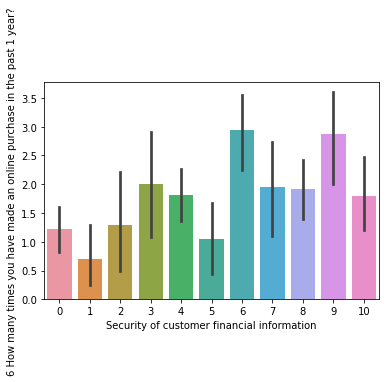

In [24]:
sns.barplot(x = df['Security of customer financial information'],y=y,data=df)

<AxesSubplot:xlabel='Availability of several payment options', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

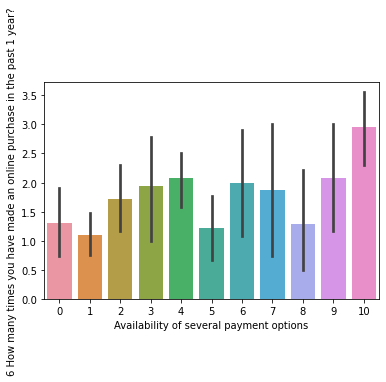

In [23]:
sns.barplot(x = df['Availability of several payment options'],y=y,data=df)

<AxesSubplot:xlabel='Fast loading website speed of website and application', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

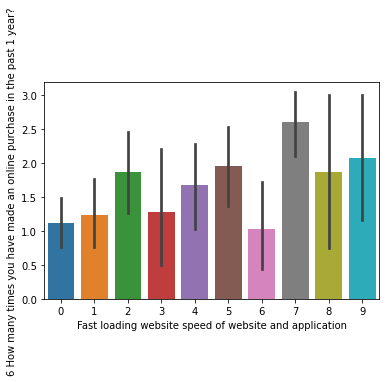

In [22]:
sns.barplot(x = df['Fast loading website speed of website and application'],y=y,data=df)

<AxesSubplot:xlabel='39 Offering a wide variety of listed product in several category', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

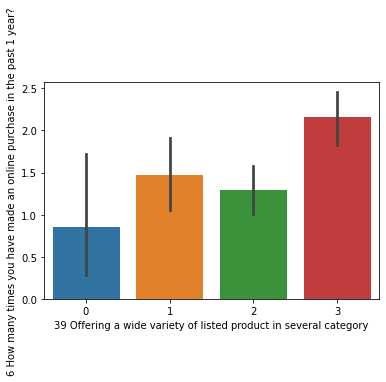

In [21]:
sns.barplot(x = df['39 Offering a wide variety of listed product in several category'],y=y,data=df)

<AxesSubplot:xlabel='36 User derive satisfaction while shopping on a good quality website or application', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

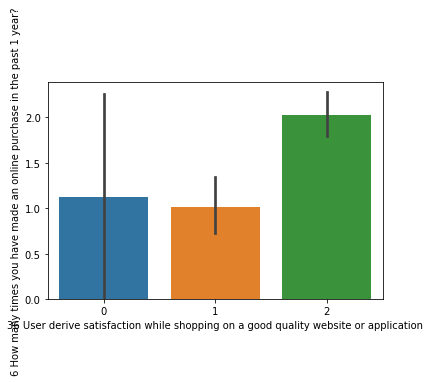

In [20]:
sns.barplot(x = df['36 User derive satisfaction while shopping on a good quality website or application'],y=y,data=df)

<AxesSubplot:xlabel='35 Displaying quality Information on the website improves satisfaction of customers', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

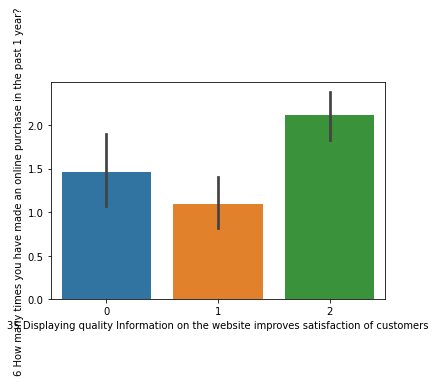

In [19]:
sns.barplot(x = df['35 Displaying quality Information on the website improves satisfaction of customers'],y=y,data=df)

<AxesSubplot:xlabel='32 Shopping online is convenient and flexible', ylabel='6 How many times you have made an online purchase in the past 1 year?'>

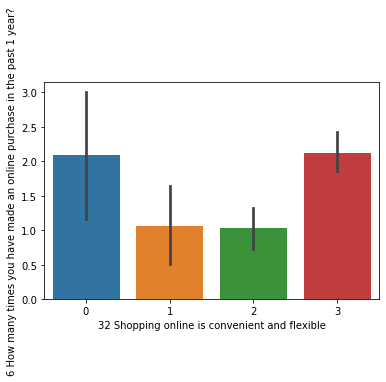

In [18]:
sns.barplot(x = df['32 Shopping online is convenient and flexible'],y=y,data=df)

In [16]:
df.describe()

1Gender of respondent  2 How old are you?   \
count             269.000000           269.000000   
mean                0.669145             2.959108   
std                 0.471398             1.066012   
min                 0.000000             1.000000   
25%                 0.000000             2.000000   
50%                 1.000000             3.000000   
75%                 1.000000             4.000000   
max                 1.000000             5.000000   

       4 What is the Pin Code of where you shop online from?  \
count                                         269.000000       
mean                                       220465.747212       
std                                        140524.341051       
min                                        110008.000000       
25%                                        122018.000000       
50%                                        201303.000000       
75%                                        201310.000000       
max                                        560037.000000       

       5 Since How Long You are Shopping Online ?  \
count                                  269.000000   
mean                                     3.524164   
std                                      1.436586   
min                                      1.000000   
25%                                      3.000000   
50%                                      4.000000   
75%                                      5.000000   
max                                      5.000000   

       6 How many times you have made an online purchase in the past 1 year?  \
count                                         269.000000                       
mean                                            2.672862                       
std                                             1.651788                       
min                                             1.000000                       
25%                                             1.000000                       
50%                                             2.000000                       
75%                                             4.000000                       
max                                             5.000000                       

       7 How do you access the internet while shopping on-line?  \
count                                         269.000000          
mean                                            3.260223          
std                                             1.135887          
min                                             2.000000          
25%                                             2.000000          
50%                                             3.000000          
75%                                             5.000000          
max                                             5.000000          

       8 Which device do you use to access the online shopping?  \
count                                         269.000000          
mean                                            1.676580          
std                                             0.843904          
min                                             1.000000          
25%                                             1.000000          
50%                                             1.000000          
75%                                             2.000000          
max                                             4.000000          

       9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
count                                         269.000000                                                      
mean                                            4.282528                                                      
std                                             0.923426                                                      
min                                             2.000000                                             

##### Checking for outliers by plotting boxplot

##### Using PCA as Dimentionality Reduction technique

##### Before that checking skewness of x and removing

In [26]:
x.skew()

1Gender of respondent                                                                                                                                                                                                 -0.723007
2 How old are you?                                                                                                                                                                                                     0.063243
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  1.748322
5 Since How Long You are Shopping Online ?                                                                                                                                                                            -0.554705
7 How do you access the internet while shopping on-line?                                                

#### Skewness exists

##### Removing skewness

In [31]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[-1.42213639e+00,  7.46934913e-02, -6.95625009e-01, ...,
        -1.49569060e+00, -1.18573039e+00,  1.30662280e+00],
       [ 7.03167437e-01, -8.86788701e-01, -6.95625009e-01, ...,
         2.44921038e-01, -2.32457627e-01,  5.76359546e-01],
       [ 7.03167437e-01, -8.86788701e-01,  1.21093689e-03, ...,
         9.32512819e-01, -1.18573039e+00,  1.10620423e+00],
       ...,
       [ 7.03167437e-01,  9.74750554e-01, -1.69206513e+00, ...,
         1.25402345e+00, -1.18573039e+00, -1.26488089e+00],
       [ 7.03167437e-01, -1.95146088e+00,  1.51555165e+00, ...,
         5.97173096e-01,  1.21590474e+00, -1.26488089e+00],
       [ 7.03167437e-01,  9.74750554e-01, -3.26067362e-01, ...,
        -1.49569060e+00, -1.18573039e+00, -1.26488089e+00]])

In [32]:
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

1Gender of respondent                                                                                                                                                                                                 -0.723007
2 How old are you?                                                                                                                                                                                                    -0.082571
3 Which city do you shop online from?                                                                                                                                                                                 -0.132990
4 What is the Pin Code of where you shop online from?                                                                                                                                                                 -0.192060
5 Since How Long You are Shopping Online ?                                                              

#### Skewness is removed from the dataset

#### Scaling X

In [33]:
scale = StandardScaler()
X_scaled = scale.fit_transform(x_new)

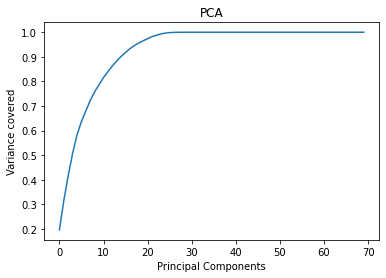

In [34]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance covered")
plt.title("PCA")
plt.show()

In [35]:
pca = PCA(n_components=22)
principal = pca.fit_transform(X_scaled)
principal_x = pd.DataFrame(principal,columns=['PC1','PC2',"PC3","PC4",'PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22'])
principal_x

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    3.438853  5.843732 -3.353188 -2.305116 -4.798356 -1.446330 -2.136324   
1   -6.164117 -0.447876  0.304481  0.003584  2.376100 -1.233319  0.534079   
2   -4.400678  3.120042  1.345280 -1.556611 -1.622129  0.863405 -2.183202   
3    1.356355  1.330843 -4.049705  1.922263  1.142261  4.496874  0.703931   
4   -3.479289  1.981030 -1.310644 -2.255406  6.847953 -1.519643 -0.914164   
5   -4.598285  1.353612  3.278309  0.706792 -1.662892  0.141323 -0.314458   
6    1.599242  1.407446 -2.452742 -1.781249 -0.523571 -2.825466  0.436357   
7    7.483676  0.651604  5.921908 -3.737577  1.440827  1.146418  1.010527   
8   -1.397313  2.464877  1.604184  3.597767 -0.686652 -1.741089  1.787154   
9    0.291496 -3.643683 -1.017469  0.809239 -0.707047 -0.743433 -0.703694   
10   3.118176  0.605883 -2.227845 -1.041130 -1.587360 -2.026170  4.904316   
11  -0.409125 -4.027773  0.358724 -2.224891 -1.351923  1.650833 -1.488933   
12  -2.195011 -4.931723 -1.097585 -0.638101 -1.027551 -1.268888  1.583192   
13  -1.396189 -4.110053 -0.809468 -2.395229 -0.975324  0.373196  1.214230   
14  -4.406332  3.046665  1.227412 -1.222579 -1.533280  0.655059 -2.343778   
15   1.085040  1.137254 -3.593022  1.763493  1.775055  4.637208  0.320283   
16  -2.634582  1.672260 -1.739111 -2.888700  5.304099 -1.886988 -0.177418   
17  -3.836828  0.699610  3.109094  0.051363 -2.362224 -0.354200 -0.316157   
18   1.495990  1.086776 -2.175602 -1.528784 -0.433521 -2.895558  0.075069   
19   1.165197  1.117393 -3.901159  2.164239  1.257576  4.384594  0.491465   
20  -3.386683  2.054382 -1.530855 -1.957734  6.414504 -1.668306 -0.718836   
21   7.089871  1.124826  5.823659 -3.226123  2.162652  1.181651  0.924567   
22  -0.800854  2.258776  1.617477  2.381668 -1.247185 -1.970900  2.204687   
23   0.467390 -3.551610 -0.894420  0.180981 -1.203663 -0.547906 -0.272464   
24   2.582449  0.965659 -2.065527 -0.229286 -0.693792 -1.689355  4.326951   
25  -0.472548 -3.885874  0.457108 -2.145361 -0.644704  1.928733 -1.953984   
26  -2.086714 -4.499585 -1.320520 -0.394465 -0.719839 -1.086387  1.565471   
27  -1.105952 -3.851668 -1.105721 -2.414435 -1.100408  0.469490  1.245643   
28  -3.711761  2.410685  1.447863 -2.682232 -2.925584  0.597465 -1.770806   
29   1.733749  0.690521 -3.894507  1.200886  0.416447  4.337198  0.687193   
30  -3.430671  2.163219 -1.337107 -2.390302  6.685413 -1.238119 -0.807554   
31   3.452928  5.987562 -3.331932 -2.128018 -4.806274 -1.531631 -1.994834   
32  -5.861176 -0.165928  0.122561 -0.149070  2.202956 -1.180194  0.729164   
33  -4.259951  3.104601  1.375566 -1.826036 -1.866885  0.899017 -2.096847   
34   1.382803  1.097143 -3.830077  1.688123  0.986227  4.520505  0.528552   
35  -3.381183  2.124153 -1.324107 -2.314197  6.797302 -1.358028 -0.928204   
36  -4.322079  1.671322  3.004133  0.972360 -1.504872  0.096630 -0.410005   
37   1.719890  1.530403 -2.525775 -1.796914 -0.628752 -2.674807  0.384874   
38   7.346801  0.599046  6.187910 -3.882650  1.382318  1.327852  1.019631   
39  -1.253786  2.517961  1.617410  3.423193 -0.703055 -1.600998  1.668447   
40   0.257059 -3.443274 -0.809627  0.349496 -0.706734 -0.342217 -0.477919   
41   3.204823  0.658677 -2.338177 -0.906723 -1.632919 -2.007646  4.794009   
42  -0.236220 -3.723174  0.074371 -1.993575 -0.987324  1.800933 -1.751039   
43  -2.254532 -4.655581 -1.105656 -0.393571 -0.669022 -1.023935  1.429240   
44   3.263195  5.804079 -3.054757 -2.350768 -4.803864 -1.365663 -2.065476   
45  -6.073487 -0.350926  0.573795 -0.413233  2.533384 -1.082905  0.570342   
46  -4.074850  3.328551  1.131188 -1.767353 -2.114172  0.788846 -1.767880   
47   1.359446  1.376037 -4.097357  1.883554  1.201984  4.691325  0.572831   
48   1.250694  1.190523 -3.750158  1.815782  1.355360  4.600143  0.440183   
49  -3.222467  2.091446 -1.567701 -2.311419  6.069416 -1.436545 -0.655449   
50  -4.536278  1.377857  3.456025  0.459852 -1.203007  0.335637 -0.664176   
51   1

In [36]:
new_df = pd.concat([principal_x,y],axis=1)
new_df.head(3)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.438853  5.843732 -3.353188 -2.305116 -4.798356 -1.446330 -2.136324   
1 -6.164117 -0.447876  0.304481  0.003584  2.376100 -1.233319  0.534079   
2 -4.400678  3.120042  1.345280 -1.556611 -1.622129  0.863405 -2.183202   

        PC8       PC9      PC10  ...      PC14      PC15      PC16      PC17  \
0  1.821951 -2.354779 -1.122731  ...  0.148838 -0.003142  0.397378 -0.047925   
1  2.356707 -2.883533 -0.823916  ... -0.236159  1.011807 -1.095961  1.387435   
2 -1.513273  1.753156 -1.412184  ... -0.396086 -0.060625 -0.363448  0.307772   

       PC18      PC19      PC20      PC21      PC22  \
0  0.886711 -0.010354 -0.618208 -0.478273  0.684345   
1 -1.094858 -1.014116 -0.863451  0.029971  0.251427   
2 -0.268194 -0.926948 -0.459132 -0.366865 -0.413468   

   6 How many times you have made an online purchase in the past 1 year?  
0                                                  3                      
1                                                  4                      
2                                                  4                      

[3 rows x 23 columns]

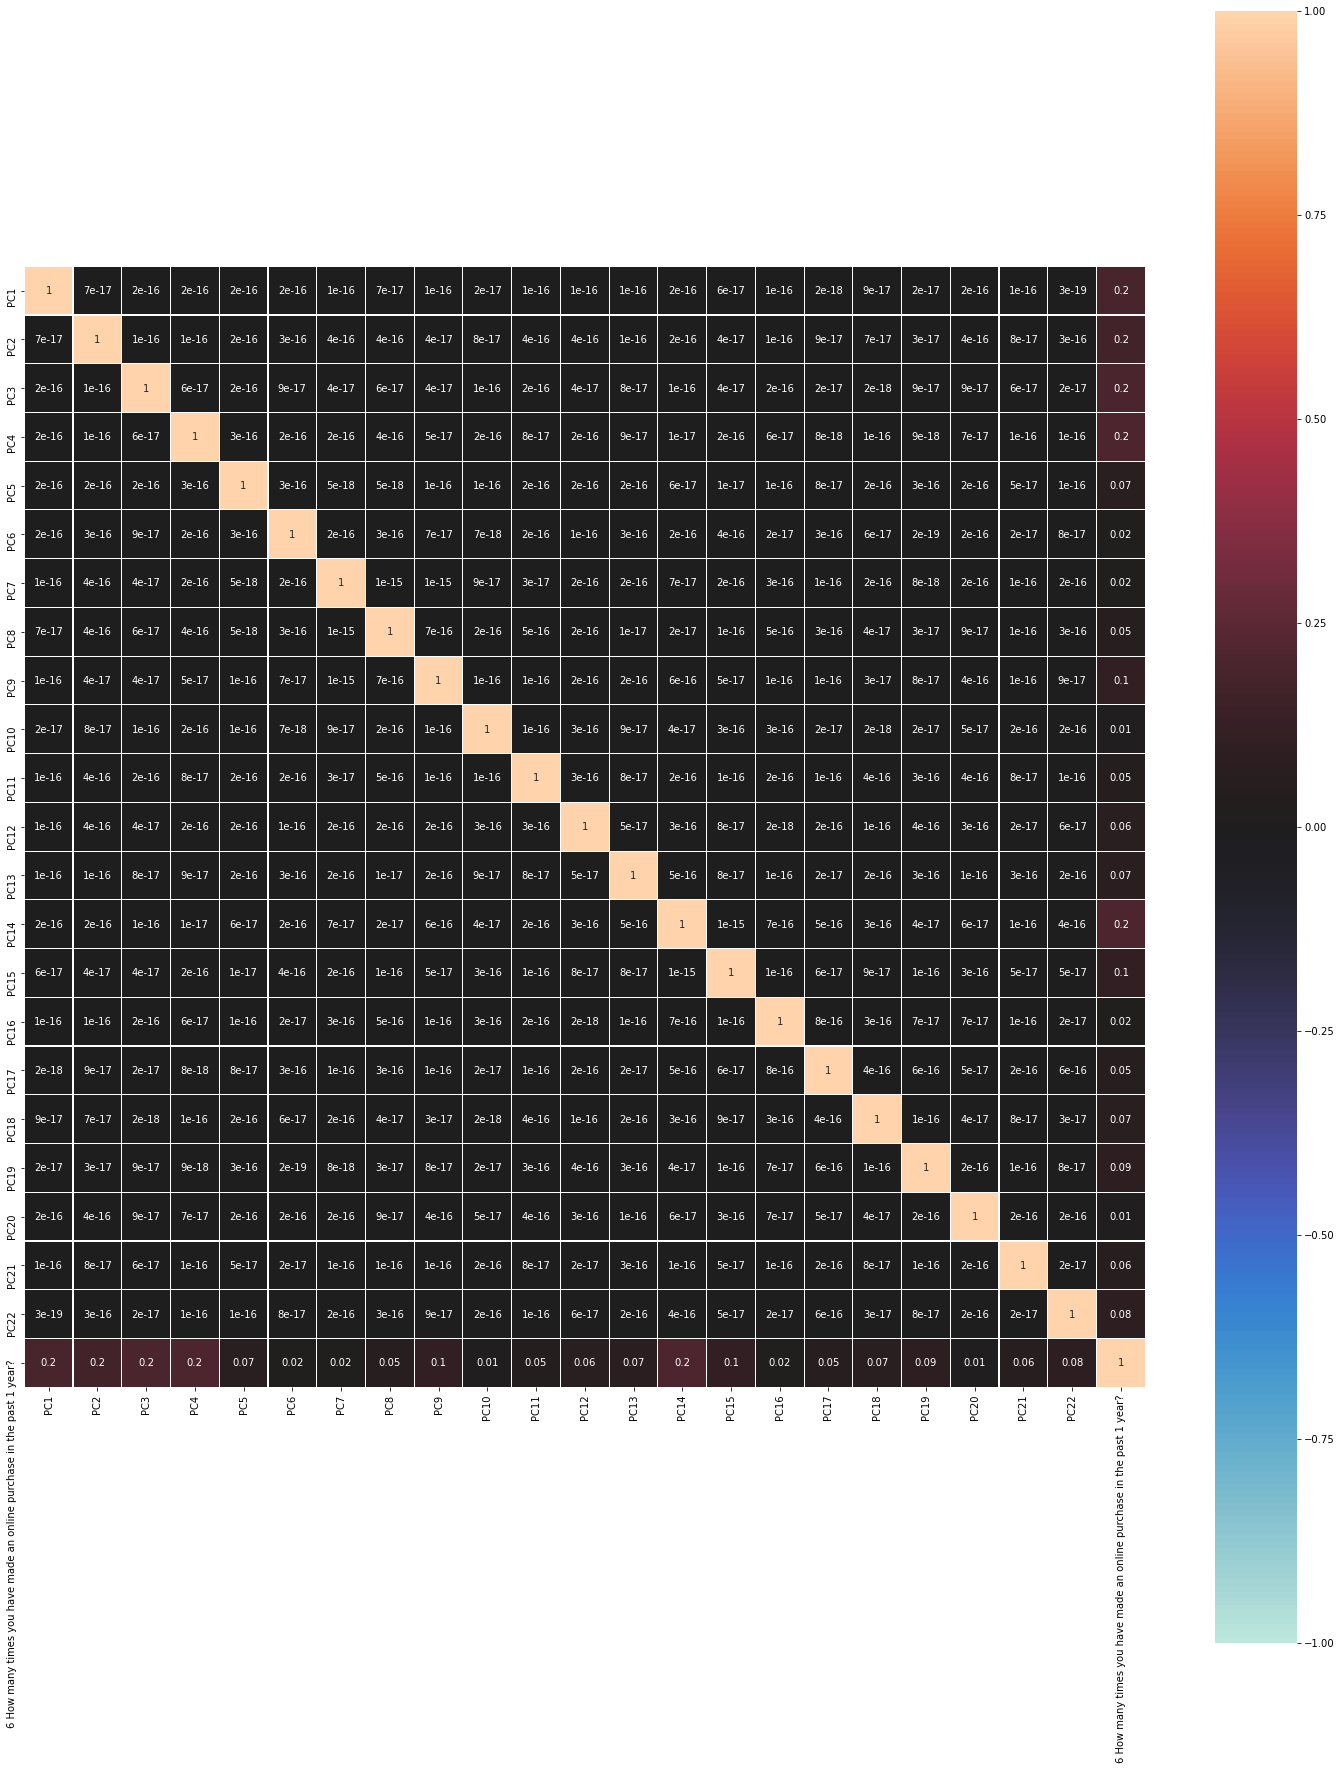

In [37]:
new_df_corr = new_df.corr().abs()
plt.figure(figsize=(20,25))
sns.heatmap(new_df_corr,vmin=-1,vmax=1,annot=True,square = True,center=0,fmt='.1g',linewidth=.2)
plt.tight_layout()

#### Finding the maximum accuracy

In [40]:
max_accuracy = 0
max_rs = 0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    accu_score = accuracy_score(y_test,y_pred)
    if accu_score>max_accuracy:
        max_accuracy = accu_score
        max_rs = i
print("Maximum accuracy is",max_accuracy,"when",max_rs,"is the random state")

Maximum accuracy is 0.8235294117647058 when 71 is the random state


#### Splitting the dataset into train and test

In [42]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state = 71)

#### Logistic Regression

In [43]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,y_pred_lr)
print("Accuracy of Logistic Regression model is ",lr_accuracy)
print("Confusion Matrix","\n",confusion_matrix(y_test,y_pred_lr))
classification_rep = classification_report(y_test,y_pred_lr)
print("Classification report ; \n",classification_rep)

Accuracy of Logistic Regression model is  0.8235294117647058
Confusion Matrix 
 [[29  0  0  1  0]
 [ 0  8  0  1  0]
 [ 0  0  4  0  1]
 [ 2  0  0  6  4]
 [ 2  0  0  1  9]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       1.00      0.89      0.94         9
           2       1.00      0.80      0.89         5
           3       0.67      0.50      0.57        12
           4       0.64      0.75      0.69        12

    accuracy                           0.82        68
   macro avg       0.84      0.78      0.80        68
weighted avg       0.82      0.82      0.82        68



#### Logistic Regression works with an accuracy of 82.35%

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,y_pred_dt)
conf_mat = confusion_matrix(y_test,y_pred_dt)
classification_rep = classification_report(y_test,y_pred_dt)
print("Accuracy of Decision Tree classifier model is ",dt_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Decision Tree classifier model is  0.8676470588235294
Confusion Matrix 
 [[29  0  0  0  1]
 [ 0  7  0  2  0]
 [ 0  0  4  0  1]
 [ 1  1  0  9  1]
 [ 1  0  1  0 10]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.88      0.78      0.82         9
           2       0.80      0.80      0.80         5
           3       0.82      0.75      0.78        12
           4       0.77      0.83      0.80        12

    accuracy                           0.87        68
   macro avg       0.84      0.83      0.83        68
weighted avg       0.87      0.87      0.87        68



#### DecisionTree classifier works with an accuracy of 86.76%

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred_rf)
conf_mat = confusion_matrix(y_test,y_pred_rf)
classification_rep = classification_report(y_test,y_pred_rf)
print("Accuracy of Random forest classifier model is ",rf_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Random forest classifier model is  0.8529411764705882
Confusion Matrix 
 [[29  0  0  0  1]
 [ 0  8  0  0  1]
 [ 3  0  2  0  0]
 [ 0  1  0  9  2]
 [ 1  0  0  1 10]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.89      0.89      0.89         9
           2       1.00      0.40      0.57         5
           3       0.90      0.75      0.82        12
           4       0.71      0.83      0.77        12

    accuracy                           0.85        68
   macro avg       0.88      0.77      0.79        68
weighted avg       0.86      0.85      0.85        68



##### RandomForest works with an accuracy of 85.29%

In [46]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test,y_pred_svc)
conf_mat = confusion_matrix(y_test,y_pred_svc)
classification_rep = classification_report(y_test,y_pred_svc)
print("Accuracy of SVC model is ",svc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of SVC model is  0.6617647058823529
Confusion Matrix 
 [[26  0  0  3  1]
 [ 0  6  0  2  1]
 [ 4  0  0  0  1]
 [ 3  1  0  4  4]
 [ 1  0  0  2  9]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.86      0.67      0.75         9
           2       0.00      0.00      0.00         5
           3       0.36      0.33      0.35        12
           4       0.56      0.75      0.64        12

    accuracy                           0.66        68
   macro avg       0.51      0.52      0.51        68
weighted avg       0.61      0.66      0.63        68



#### SVC works with an accuracy of 66.18%

In [47]:
import xgboost as xgb
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred_xgbc = xgbc.predict(x_test)
xgbc_accuracy = accuracy_score(y_test,y_pred_xgbc)
conf_mat = confusion_matrix(y_test,y_pred_xgbc)
classification_rep = classification_report(y_test,y_pred_xgbc)
print("Accuracy of Xgboost model is ",xgbc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

[11:27:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Xgboost model is  0.8970588235294118
Confusion Matrix 
 [[29  0  0  0  1]
 [ 0  8  0  1  0]
 [ 0  0  4  0  1]
 [ 0  1  0 10  1]
 [ 1  1  0  0 10]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.80      0.89      0.84         9
           2       1.00      0.80      0.89         5
           3       0.91      0.83      0.87        12
           4       0.77      0.83      0.80        12

    accuracy                           0.90        68
   macro avg       0.89      0.86      0.87        68
weighted avg       0.90      0.90      0.90        68



#### XGBoost Classifier works with an accuracy of 89.71%

##### Finding Cross-Validation Score

In [49]:
cvs = cross_val_score(lr,principal_x,y,cv=5)
print("Cross validation score of Logistic Regression model is : ",cvs.mean())

Cross validation score of Logistic Regression model is :  0.643466107617051


In [50]:
cvs = cross_val_score(dt,principal_x,y,cv=5)
print("Cross validation score of DecisionTreeClassifier is : ",cvs.mean())

Cross validation score of DecisionTreeClassifier is :  0.7444444444444445


In [51]:
cvs = cross_val_score(rf,principal_x,y,cv=5)
print("Cross validation score of RandomForestClassifier is : ",cvs.mean())

Cross validation score of RandomForestClassifier is :  0.8333333333333334


In [52]:
cvs = cross_val_score(svc,principal_x,y,cv=5)
print("Cross validation score of SVC is : ",cvs.mean())

Cross validation score of SVC is :  0.5916142557651992


In [53]:
cvs = cross_val_score(xgbc,principal_x,y,cv=5)
print("Cross validation score of XGBoostClassifier is : ",cvs.mean())

[11:30:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:30:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

#### Random Forest turns out to be the best model as difference between accuracy score and cross validation score is less

#### Hyper Parameter Tuning

In [55]:
from sklearn.model_selection import RandomizedSearchCV
params = {"criterion":['gini','entropy'],
         "max_features":np.arange(2,10),
         "max_depth":np.arange(2,10,1),
         "n_estimators":np.arange(10,200)
         }
grd = RandomizedSearchCV(rf,params,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)
grd.best_params_

{'n_estimators': 58, 'max_features': 5, 'max_depth': 6, 'criterion': 'entropy'}

In [60]:
model = RandomForestClassifier(criterion='entropy',n_estimators=100,max_features=18,max_depth=10)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy Score after hyperparameter tuning is ",accuracy_score(y_test,y_pred))

Accuracy Score after hyperparameter tuning is  0.8676470588235294


#### After Hyper parameter tuning accuracy increased to 86.76%

#### Plotting ROC Curve

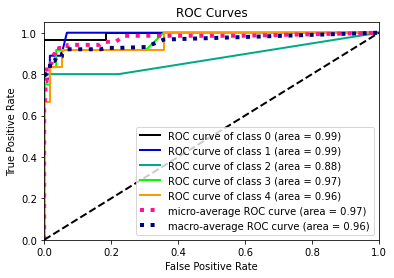

In [61]:
import scikitplot as skplt
prob = rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,prob)
plt.show()

#### Saving the model

In [62]:
filename = 'customer_retension.pkl'
pickle.dump(rf,open(filename,'wb'))